# 品牌關鍵字相關性分析


## 讀取資料和資料清洗


In [1]:
import jieba
import pandas as pd

# 設定jieba字典
jieba.set_dictionary("dict/dict.txt.big")


# 定義jieba斷詞函數
def jieba_tokenizer_z(x):
    a = list(jieba.cut(x))
    return a


# 載入stopwords
with open("dict/stopwords.txt", encoding="utf-8-sig") as f:
    stopwords = f.readlines()

# 無意義字元列表，可以自行新增
removeword = [
    "span",
    "class",
    "f3",
    "https",
    "imgur",
    "h1",
    "_   blank",
    "href",
    "rel",
    "nofollow",
    "target",
    "cdn",
    "cgi",
    "b4",
    "jpg",
    "hl",
    "b1",
    "f5",
    "f4",
    "goo.gl",
    "f2",
    "email",
    "map",
    "f1",
    "f6",
    "__cf___",
    "data",
    "bbs",
    "html",
    "cf",
    "f0",
    "b2",
    "b3",
    "b5",
    "b6",
    "原文內容",
    "原文連結",
    "作者",
    "標題",
    "時間",
    "看板",
    "<",
    ">",
    "，",
    "。",
    "？",
    "—",
    "閒聊",
    "・",
    "/",
    " ",
    "=",
    '"',
    "\n",
    "」",
    "「",
    "！",
    "[",
    "]",
    "：",
    "‧",
    "╦",
    "╔",
    "╗",
    "║",
    "╠",
    "╬",
    "╬",
    ":",
    "╰",
    "╩",
    "╯",
    "╭",
    "╮",
    "│",
    "╪",
    "─",
    "《",
    "》",
    ".",
    "、",
    "（",
    "）",
    "　",
    "*",
    "※",
    "~",
    "○",
    '"',
    '"',
    "～",
    "@",
    "＋",
    "\r",
    "▁",
    ")",
    "(",
    "-",
    "═",
    "?",
    ",",
    "!",
    "…",
    "&",
    ";",
    "『",
    "』",
    "#",
    "＝",
    "＃",
    "\\",
    "\\n",
    '"',
    "的",
    "^",
    "︿",
    "＠",
    "$",
    "＄",
    "%",
    "％",
    "＆",
    "＊",
    "＿",
    "+",
    "'",
    "{",
    "}",
    "｛",
    "｝",
    "|",
    "｜",
    "．",
    "‵",
    "`",
    "；",
    "●",
    "§",
    "※",
    "○",
    "△",
    "▲",
    "◎",
    "☆",
    "★",
    "◇",
    "◆",
    "□",
    "■",
    "▽",
    "▼",
    "㊣",
    "↑",
    "↓",
    "←",
    "→",
    "↖",
    "XD",
    "XDD",
    "QQ",
    "【",
    "】",
]

# 擴充stopwords
stopwords.extend(removeword)


In [2]:
# 讀取ptt資料
underwearData = pd.read_csv("data/PTT_運動內衣_留言資料.csv")

# 去除空值
underwearData.dropna(subset=["留言內容"], inplace=True)


## 資料清理：統一品牌名稱


In [3]:
# Nike相關
underwearData["留言內容"] = underwearData["留言內容"].str.replace("nike", "Nike")
underwearData["留言內容"] = underwearData["留言內容"].str.replace("NIKE", "Nike")
underwearData["留言內容"] = underwearData["留言內容"].str.replace("耐吉", "Nike")

# Shock Absorber相關
underwearData["留言內容"] = underwearData["留言內容"].str.replace(
    "Shock Absorber", "Shock_Absorber"
)
underwearData["留言內容"] = underwearData["留言內容"].str.replace(
    "Shock absorber", "Shock_Absorber"
)
underwearData["留言內容"] = underwearData["留言內容"].str.replace(
    "shock absorber", "Shock_Absorber"
)
underwearData["留言內容"] = underwearData["留言內容"].str.replace(
    "SHOCK ABSORBER", "Shock_Absorber"
)
underwearData["留言內容"] = underwearData["留言內容"].str.replace(
    "SA", "Shock_Absorber"
)

# Adidas相關
underwearData["留言內容"] = underwearData["留言內容"].str.replace("adidas", "Adidas")
underwearData["留言內容"] = underwearData["留言內容"].str.replace("ADIDAS", "Adidas")
underwearData["留言內容"] = underwearData["留言內容"].str.replace("addias", "Adidas")

# Under Armour相關
underwearData["留言內容"] = underwearData["留言內容"].str.replace(
    "Under Armour", "Under_Armour"
)
underwearData["留言內容"] = underwearData["留言內容"].str.replace(
    "Under armour", "Under_Armour"
)
underwearData["留言內容"] = underwearData["留言內容"].str.replace(
    "under armour", "Under_Armour"
)
underwearData["留言內容"] = underwearData["留言內容"].str.replace(
    "UNDER ARMOUR", "Under_Armour"
)
underwearData["留言內容"] = underwearData["留言內容"].str.replace("UA", "Under_Armour")

# Triumph相關
underwearData["留言內容"] = underwearData["留言內容"].str.replace("triumph", "Triumph")
underwearData["留言內容"] = underwearData["留言內容"].str.replace("TRIUMPH", "Triumph")
underwearData["留言內容"] = underwearData["留言內容"].str.replace("黛安芬", "Triumph")

# Decathlon相關
underwearData["留言內容"] = underwearData["留言內容"].str.replace(
    "decathlon", "Decathlon"
)
underwearData["留言內容"] = underwearData["留言內容"].str.replace(
    "DECATHLON", "Decathlon"
)
underwearData["留言內容"] = underwearData["留言內容"].str.replace("迪卡農", "Decathlon")
underwearData["留言內容"] = underwearData["留言內容"].str.replace("迪卡儂", "Decathlon")

# Uniqlo相關
underwearData["留言內容"] = underwearData["留言內容"].str.replace("Uniqlo", "Uniqlo")
underwearData["留言內容"] = underwearData["留言內容"].str.replace("uniqlo", "Uniqlo")
underwearData["留言內容"] = underwearData["留言內容"].str.replace("uq", "Uniqlo")
underwearData["留言內容"] = underwearData["留言內容"].str.replace("UQ", "Uniqlo")

# Calvin Klein相關
underwearData["留言內容"] = underwearData["留言內容"].str.replace(
    "Calvin Klein", "Calvin_Klein"
)
underwearData["留言內容"] = underwearData["留言內容"].str.replace(
    "Calvin klein", "Calvin_Klein"
)
underwearData["留言內容"] = underwearData["留言內容"].str.replace(
    "calvin klein", "Calvin_Klein"
)
underwearData["留言內容"] = underwearData["留言內容"].str.replace(
    "CALVIN KLEIN", "Calvin_Klein"
)

# 詞彙統一
underwearData["留言內容"] = underwearData["留言內容"].str.replace("舒服", "舒適")
underwearData["留言內容"] = underwearData["留言內容"].str.replace("好穿", "舒適")


## TF-IDF 轉換與計算


In [4]:
from sklearn.feature_extraction.text import TfidfTransformer  # Tfidf計算
from sklearn.feature_extraction.text import CountVectorizer  # 文本特徵提取

# 為cosine_similarity品牌與字詞相似度分析做準備
# 各row留言資料轉為list
terms = underwearData["留言內容"].tolist()  # 將留言內容轉換為list型式

# 各留言資料字詞切割與頻次計算
vectorizer = CountVectorizer(
    tokenizer=jieba_tokenizer_z, stop_words=stopwords, lowercase=False
)  # 詞在該文件中出現幾次用於將文本數據轉換為詞頻矩陣

x = vectorizer.fit_transform(
    terms
)  # 詞在該文件中出現幾次。對terms進行詞頻計算，生成一個稀疏矩陣x
print(x.toarray())  # 將稀疏矩陣轉換為陣列並顯示
word = (
    vectorizer.get_feature_names_out()
)  # 提取文本所有特徵詞（關鍵詞），存儲在word列表中

# TF-IDF計算
transformer = TfidfTransformer()  # 初始化TF-IDF變換器
tfidf = transformer.fit_transform(
    x
)  # 對詞頻矩陣x進行TF-IDF計算，生成一個TF-IDF矩陣tfidf。
weight = tfidf.toarray()  # 將稀疏矩陣轉tfidf換為普通的Numpy數組weight

# 轉成Dataframe
weight_df = pd.DataFrame(weight)
weight_df.columns = word
weight_df


/Volumes/Dev/nkust/nkust-homework/semester-6/marketing/05-voice/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
Building prefix dict from /Volumes/Dev/nkust/nkust-homework/semester-6/marketing/05-voice/dict/dict.txt.big ...
Loading model from cache /var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/jieba.u7f356f34462f1b91de22574178031f11.cache
Loading model cost 0.162 seconds.
Prefix dict has been built successfully.
/Volumes/Dev/nkust/nkust-homework/semester-6/marketing/05-voice/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '_', '__', '___', 'blank', 'gl', 'goo', 'n', '“', '”', '①', '②', '③', '④', '⑤', '⑥', '⑦', '⑧', '⑨', '⑩', '〔', '〕', '㈧', '一', '一一', '一來', '一

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


++  -.-  -_-   ..  ...  ....  .....  ......  .......  .........  ...  \
0     0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0      0.0        0.0  ...   
1     0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0      0.0        0.0  ...   
2     0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0      0.0        0.0  ...   
3     0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0      0.0        0.0  ...   
4     0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0      0.0        0.0  ...   
...   ...  ...  ...  ...  ...   ...    ...     ...      ...        ...  ...   
6457  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0      0.0        0.0  ...   
6458  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0      0.0        0.0  ...   
6459  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0      0.0        0.0  ...   
6460  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0      0.0        0.0  ...   
6461  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0      0.0        0.0  ...   

        ６    ＜    ＞    Ｄ    Ｇ    Ｘ    Ｙ    ［    ］    ﾟ  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
6457  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6458  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6459  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6460  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6461  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[6462 rows x 8683 columns]

## 品牌與關鍵字相關性分析


In [5]:
# 設定比較品牌
searchbrand = [
    "Nike",
    "Shock_Absorber",
    "Adidas",
    "Under_Armour",
    "Triumph",
    "Decathlon",
    "Uniqlo",
    "Calvin_Klein",
]

# 設定關鍵字
keyword = ["健身", "跑步", "高強度", "無鋼圈", "瑜珈", "舒適"]


### 計算品牌與關鍵字兩者相關性


In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# 示範cosine_similarity用法: 一個品牌一個關鍵字
weight_df["舒適"]
weight_df["Nike"]
weight_df["舒適"].tolist()  # series->list
weight_df["Nike"].tolist()  # series->list

simdemo = cosine_similarity(
    [weight_df["舒適"].tolist()], [weight_df["Nike"].tolist()]
)  # 二維矩陣

print(simdemo[0][0])  # 算出兩list相似度


0.021910090203154875


In [7]:
# 正式用法cosine_similarity用法:多個品牌多個關鍵字

All = pd.DataFrame()  # 存放所有品牌所有關鍵字
for key in keyword:
    allsim = []  # 存放一個關鍵字多個品牌
    if key in weight_df.columns:  # 如果weight_df欄位裡面有該關鍵字（key），才往下執行
        for bra in searchbrand:
            if (
                bra in weight_df.columns
            ):  # 如果weight_df欄位裡面有該品牌（brand），才計算關鍵字與品牌相似度
                sim = cosine_similarity(
                    [weight_df[key].tolist()], [weight_df[bra].tolist()]
                )  # 品牌與關鍵詞的相似性計算
                allsim.append([bra, key, sim[0][0]])
            else:  # 如果weight_df欄位裡面沒有該品牌（brand），關鍵字與品牌相似度為0
                allsim.append([bra, key, 0])
        allsim = pd.DataFrame(allsim)  # 存放一個關鍵字多個品牌
        All = pd.concat([All, allsim], axis=0)  # 注意:axis = 0 #存放多個關鍵字多個品牌


In [8]:
# 轉換df格式並存檔
All.columns = ["品牌", "關鍵字", "分數"]
All_pivot = pd.pivot_table(All, values=["分數"], index=["品牌"], columns=["關鍵字"])
# All_pivot.columns
All_pivot.columns = [col[1] for col in All_pivot.columns]
All_pivot.to_csv("多品牌多關鍵字相關係數consin1.csv", encoding="UTF-8-sig")


## 視覺化分析


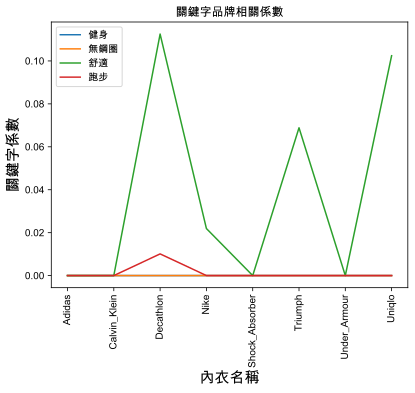

In [9]:
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]  # 使用可顯示中文的字型
plt.rcParams["axes.unicode_minus"] = False

All_pivot.plot(title="關鍵字品牌相關係數")
plt.xlabel("內衣名稱", fontsize=15)
plt.ylabel("關鍵字係數", fontsize=15)
plt.xticks(range(0, len(All_pivot.index)), All_pivot.index, fontsize=10, rotation=90)
plt.show()


## 品牌文字雲分析


Building prefix dict from /Volumes/Dev/nkust/nkust-homework/semester-6/marketing/05-voice/dict/dict.txt.big ...
Loading model from cache /var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/jieba.u7f356f34462f1b91de22574178031f11.cache
Loading model cost 0.164 seconds.
Prefix dict has been built successfully.


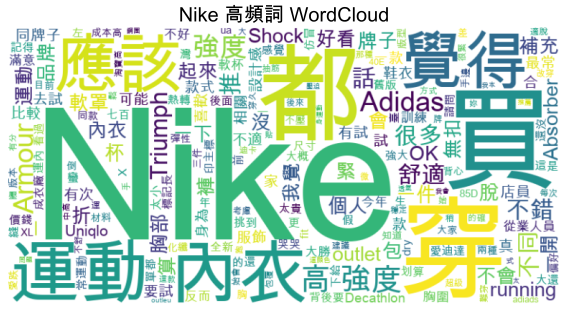

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

# 以 Nike 為例，篩選含有「Nike」的留言
nike_texts = underwearData[underwearData["留言內容"].str.contains("Nike")]["留言內容"]

# 合併所有文字
text_all = " ".join(nike_texts.tolist())

# jieba切詞
jieba.set_dictionary("dict/dict.txt.big")
wordslist = jieba.lcut(text_all, cut_all=False)

# 去除停用詞
with open("dict/stopwords.txt", "r", encoding="utf-8-sig") as f:
    stops = f.read().split("\n")

words = []
for word in wordslist:
    if word not in stops:
        words.append(word)

# 合併為一段文字
clean_text = " ".join(words)

font_path = (
    "/System/Library/Fonts/Supplemental/Arial Unicode.ttf"  # Arial Unicode MS 字型路徑
)

# 再重新產生 WordCloud
wc = WordCloud(
    font_path=font_path, width=800, height=400, background_color="white"
).generate(clean_text)

# 顯示
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Nike 高頻詞 WordCloud", fontsize=20)
plt.show()


## 問題


計算下列電影與關鍵字的相關係數。

movie = ['成為王的男人','皇后的品格','赤月青日','神的測驗','死之詠讚',

          '加油吧威基基','皮諾丘','魔女寶鑑','男朋友','來自星星的你']

focus_keyword=['預告','中字','媽媽','官網','刑警','韓國']


/Volumes/Dev/nkust/nkust-homework/semester-6/marketing/05-voice/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Volumes/Dev/nkust/nkust-homework/semester-6/marketing/05-voice/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '_', '__', '___', 'blank', 'gl', 'goo', 'n', '“', '”', '①', '②', '③', '④', '⑤', '⑥', '⑦', '⑧', '⑨', '⑩', '〔', '〕', '㈧', '一', '一一', '一來', '一切', '一則', '一方面', '一旦', '一樣', '一般', '七', '三', '上', '上下', '下', '不', '不但', '不僅', '不光', '不問', '不單', '不如', '不怕', '不惟', '不成', '不拘', '不是', '不比', '不然', '不特', '不獨', '不管', '不論', '不過', '且', '並', '並且', '乃', '乃至', '么', '之', '之一', '之外', '之所以', '之類', '乎', '乘', '九', '也', '也好', '也罷', '了', '二', '云云', '五', '些', '亦', '人', '人家

<Figure size 1500x800 with 0 Axes>

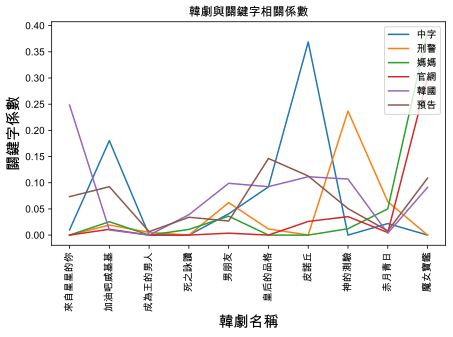

In [11]:
# 讀取KoreaDrama_re資料
kdrama_data = pd.read_csv("data/KoreaDrama_re.csv")

# 設定電影清單
movie = [
    "成為王的男人",
    "皇后的品格",
    "赤月青日",
    "神的測驗",
    "死之詠讚",
    "加油吧威基基",
    "皮諾丘",
    "魔女寶鑑",
    "男朋友",
    "來自星星的你",
]

# 設定關鍵字清單
focus_keyword = ["預告", "中字", "媽媽", "官網", "刑警", "韓國"]

# 清理並準備資料
kdrama_data.dropna(subset=["內容"], inplace=True)

# 將留言內容轉換為list
drama_terms = kdrama_data["內容"].tolist()

# 向量化
drama_vectorizer = CountVectorizer(
    tokenizer=jieba_tokenizer_z, stop_words=stopwords, lowercase=False
)
drama_x = drama_vectorizer.fit_transform(drama_terms)
drama_word = drama_vectorizer.get_feature_names_out()

# TF-IDF計算
drama_transformer = TfidfTransformer()
drama_tfidf = drama_transformer.fit_transform(drama_x)
drama_weight = drama_tfidf.toarray()

# 轉成Dataframe
drama_weight_df = pd.DataFrame(drama_weight)
drama_weight_df.columns = drama_word

# 計算電影與關鍵字的相關性
drama_all = pd.DataFrame()
for key in focus_keyword:
    drama_allsim = []
    if key in drama_weight_df.columns:
        for mv in movie:
            if mv in drama_weight_df.columns:
                drama_sim = cosine_similarity(
                    [drama_weight_df[key].tolist()], [drama_weight_df[mv].tolist()]
                )
                drama_allsim.append([mv, key, drama_sim[0][0]])
            else:
                drama_allsim.append([mv, key, 0])
        drama_allsim = pd.DataFrame(drama_allsim)
        drama_all = pd.concat([drama_all, drama_allsim], axis=0)

# 轉換df格式並存檔
drama_all.columns = ["電影", "關鍵字", "分數"]
drama_all_pivot = pd.pivot_table(
    drama_all, values=["分數"], index=["電影"], columns=["關鍵字"]
)
drama_all_pivot.columns = [col[1] for col in drama_all_pivot.columns]
drama_all_pivot.to_csv("韓劇與關鍵字相關係數.csv", encoding="UTF-8-sig")

# 繪圖
plt.figure(figsize=(15, 8))
drama_all_pivot.plot(title="韓劇與關鍵字相關係數")
plt.xlabel("韓劇名稱", fontsize=15)
plt.ylabel("關鍵字係數", fontsize=15)
plt.xticks(
    range(0, len(drama_all_pivot.index)),
    drama_all_pivot.index,
    fontsize=10,
    rotation=90,
)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()
